In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [104]:
df1 = pd.read_csv("F:Datasets/brasil-real-estate/brasil_1.csv")
df2 = pd.read_csv("F:Datasets/brasil-real-estate/brasil_2.csv")

In [105]:
df1.shape

(12834, 6)

In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            12834 non-null  object 
 1   place_with_parent_names  12834 non-null  object 
 2   region                   12834 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  12834 non-null  float64
 5   price_usd                12834 non-null  object 
dtypes: float64(1), object(5)
memory usage: 601.7+ KB


In [107]:
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


# Cleaning of Data

## cleaning of DataFrame 1

In [108]:
# creating state column from place_with_parent_class column
df1["state"] = df1["place_with_parent_names"].str.split("|",expand=True)[2]

In [109]:
#Creating seperate column for "lat" and "lon" 
df1[["lat","lon"]] = df1["lat-lon"].str.split(",",expand=True).astype("float")

In [110]:
#drop columns ["lat-lon","place_with_parent_names"]
df1.drop(columns=["lat-lon","place_with_parent_names"],inplace=True)

In [111]:
#modifiying prrice_usd to float 
df1["price_usd"] = (df1["price_usd"].str.replace("$","").str.replace(",","")).astype(float)

In [112]:
#drop NaN values
df1.dropna(inplace=True)

In [113]:
df1.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


In [114]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11551 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11551 non-null  object 
 1   region         11551 non-null  object 
 2   area_m2        11551 non-null  float64
 3   price_usd      11551 non-null  float64
 4   state          11551 non-null  object 
 5   lat            11551 non-null  float64
 6   lon            11551 non-null  float64
dtypes: float64(4), object(3)
memory usage: 721.9+ KB


(11551, 7)

## cleaning of DataFrame 1

In [115]:
df2.shape

(12833, 7)

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


In [117]:
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [118]:
#(Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)

In [119]:
# drop "NaN" values
df2.dropna(inplace=True)

In [120]:
#Transform price_brl inot price_usd
df2["price_usd"] = (df2["price_brl"] / 3.19).round(2)
#drop price_brl column
df2.drop(columns=["price_brl"],inplace=True)

In [121]:
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.46
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.79
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.80
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.79
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.10


In [122]:
df1.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


### Concatenate both dataframe

In [123]:
df = pd.concat([df1,df2],axis=0)

In [124]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22844 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  22844 non-null  object 
 1   region         22844 non-null  object 
 2   area_m2        22844 non-null  float64
 3   price_usd      22844 non-null  float64
 4   state          22844 non-null  object 
 5   lat            22844 non-null  float64
 6   lon            22844 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.4+ MB


,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


# Exploratory Data Analysis

In [125]:
# We have to catagories the data

In [126]:
df.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


### Location Data

In [127]:
# "lat" and "lon" columns having locational data
# since they are based on coordinates we can draw scatter plot of them

In [128]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    height=600,
    width=600,
    center = {"lat": -14.2, "lon": -51.9},
    hover_data = ["price_usd"]
                 )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

### Catogorical Data

In [129]:
df.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


In [130]:
#property type
print(df["property_type"].unique())
print(df["property_type"].value_counts())

['apartment' 'house']
apartment    18463
house         4381
Name: property_type, dtype: int64


In [131]:
#region
print(df["region"].unique())
print(df["region"].value_counts())

['Northeast' 'North' 'Central-West' 'Southeast' 'South']
Southeast       8533
South           7821
Northeast       4794
Central-West    1387
North            309
Name: region, dtype: int64


In [132]:
#states
print(df["state"].nunique())
print(df["state"].unique())
print(df["state"].value_counts())#

25
['Alagoas' 'Amapá' 'Amazonas' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Mato Grosso' 'Mato Grosso do Sul'
 'Minas Gerais' 'Paraná' 'Paraíba' 'Pará' 'Pernambuco' 'Piauí'
 'Rio Grande do Norte' 'Rio Grande do Sul' 'Rio de Janeiro' 'Rondônia'
 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']
Minas Gerais           2680
São Paulo              2656
Rio Grande do Sul      2643
Rio de Janeiro         2642
Santa Catarina         2634
Paraná                 2544
Bahia                  2045
Ceará                  1574
Distrito Federal        732
Espírito Santo          555
Goiás                   555
Pernambuco              406
Rio Grande do Norte     302
Pará                    299
Paraíba                 250
Maranhão                101
Mato Grosso              86
Sergipe                  68
Piauí                    24
Alagoas                  24
Mato Grosso do Sul       14
Rondônia                  5
Amazonas                  3
Amapá                     1
T

In [133]:
df_south_east = df[df["region"]=="Southeast"]

print(df_south_east["state"].nunique(),
      df_south_east["state"].unique(),
      df_south_east["state"].value_counts(),
      sep="\n"
)

4
['Espírito Santo' 'Minas Gerais' 'Rio de Janeiro' 'São Paulo']
Minas Gerais      2680
São Paulo         2656
Rio de Janeiro    2642
Espírito Santo     555
Name: state, dtype: int64


In [134]:
df_south = df[df["region"]=="South"]
print(df_south["state"].unique())
print(df_south["state"].value_counts())

['Paraná' 'Rio Grande do Sul' 'Santa Catarina']
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: state, dtype: int64


In [135]:
df_north_east = df[df["region"]=="Northeast"]
print(df_north_east["state"].unique())
print(df_north_east["state"].value_counts())

['Alagoas' 'Bahia' 'Ceará' 'Maranhão' 'Paraíba' 'Pernambuco' 'Piauí'
 'Rio Grande do Norte' 'Sergipe']
Bahia                  2045
Ceará                  1574
Pernambuco              406
Rio Grande do Norte     302
Paraíba                 250
Maranhão                101
Sergipe                  68
Alagoas                  24
Piauí                    24
Name: state, dtype: int64


In [136]:
df_north = df[df["region"]=="North"]
print(df_north["state"].unique())
print(df_north["state"].value_counts())

['Amapá' 'Amazonas' 'Pará' 'Rondônia' 'Tocantins']
Pará         299
Rondônia       5
Amazonas       3
Tocantins      1
Amapá          1
Name: state, dtype: int64


In [137]:
df_central_west = df[df["region"]=="Central-West"]
print(df_central_west["state"].unique())
print(df_central_west["state"].value_counts())

['Distrito Federal' 'Goiás' 'Mato Grosso' 'Mato Grosso do Sul']
Distrito Federal      732
Goiás                 555
Mato Grosso            86
Mato Grosso do Sul     14
Name: state, dtype: int64


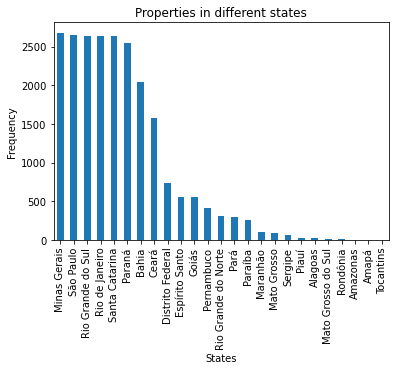

In [138]:
df_state = df["state"].value_counts()
df_state.plot(
    kind="bar",
    xlabel="States",
    ylabel="Frequency",
    title="Properties in different states"
             );

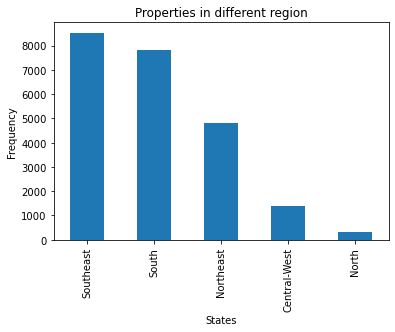

In [139]:
df_region =df["region"].value_counts()
df_region.plot(
    kind="bar",
    xlabel="States",
    ylabel="Frequency",
    title="Properties in different region"
);

### Numeric Data

In [140]:
df.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227


In [141]:
df[["area_m2","price_usd"]].head()

,area_m2,price_usd
0,110.0,187230.85
1,65.0,81133.37
2,211.0,154465.45
3,99.0,146013.20
4,55.0,101416.71


In [142]:
df[["area_m2","price_usd"]].describe()

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315515
std,47.742932,103617.682979
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.882500
max,252.000000,525659.720000


In [143]:
#visualising the distribution of home size and price

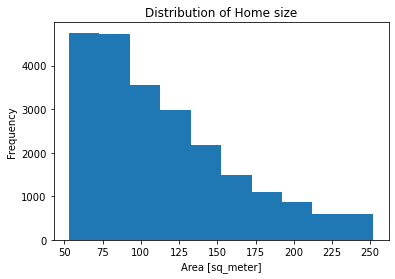

In [144]:


plt.hist(df["area_m2"]),
plt.xlabel("Area [sq_meter]")
plt.ylabel("Frequency")
plt.title("Distribution of Home size");


(Text(0.5, 1.0, 'Distribution of home size'),)

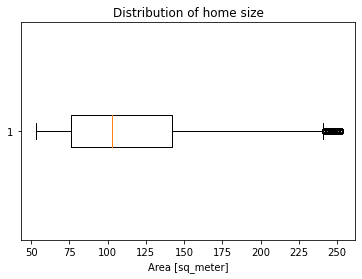

In [145]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq_meter]")
plt.title("Distribution of home size"),

In [146]:
#Similarly for price_usd coloumn

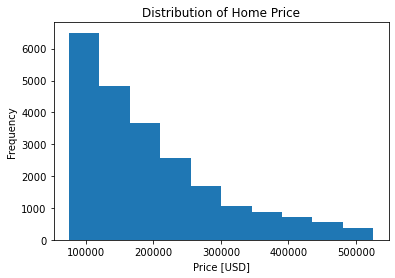

In [147]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Price");

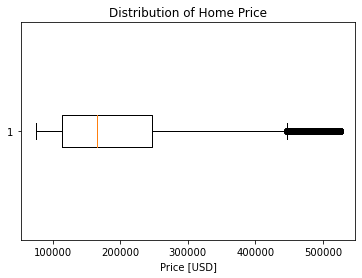

In [148]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Price");

It is clearly visible from the visualisation of ditribution of home size and price that both are left skewd
both having more houses at lower end of distribution than higher end

# Research Question

Q1. Which region has expensive real estate market

In [149]:
print(df["region"].unique())
print(df["region"].value_counts())

['Northeast' 'North' 'Central-West' 'Southeast' 'South']
Southeast       8533
South           7821
Northeast       4794
Central-West    1387
North            309
Name: region, dtype: int64


In [150]:
df_region = df.groupby("region")["price_usd"].mean()
df_region

region
Central-West    178596.283663
North           181308.958188
Northeast       185422.985482
South           189012.345360
Southeast       208996.762761
Name: price_usd, dtype: float64

According to this research Central-West having most expensive properties. Is this the same with price_per_m2

In [151]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
df_region = df.groupby("region")["price_per_m2"].mean()
df_region

region
Central-West    1602.232486
North           1613.629152
Northeast       1600.886068
South           1687.930296
Southeast       1958.288815
Name: price_per_m2, dtype: float64

Q2 Is there any relationship between property size and price

to find relationship between two columns we can use scatter plot(based on coordinate system)

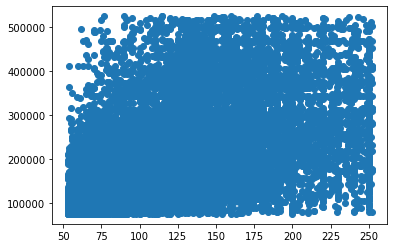

In [152]:
plt.scatter(x=df["area_m2"],y=df["price_usd"])

In [153]:
df["area_m2"].corr(df["price_usd"])

0.5310399664539839

0.5310399664539839 a moderate positive correlation

Let take a look at correlation between this columns only in Central-West region

In [154]:
df_central_west = df[df["region"]=="Central-West"]
df_central_west.head()

,property_type,region,area_m2,price_usd,state,lat,lon,price_per_m2
4051,apartment,Central-West,181.0,425241.46,Distrito Federal,-15.794229,-47.882166,2349.400331
4052,apartment,Central-West,96.0,287197.77,Distrito Federal,-15.750695,-47.910943,2991.643438
4054,apartment,Central-West,87.0,215909.34,Distrito Federal,-15.794229,-47.882166,2481.716552
4055,apartment,Central-West,67.0,186225.61,Distrito Federal,-15.794229,-47.882166,2779.486716
4056,apartment,Central-West,73.0,230414.74,Distrito Federal,-15.750695,-47.910943,3156.366301


In [155]:
df_central_west["area_m2"].corr(df_central_west["price_usd"])


0.55141619572976

Same questios but this time state wise

Q1 which state has expensive real estate market

In [156]:
print(df["state"].unique())
print(df["state"].value_counts())

['Alagoas' 'Amapá' 'Amazonas' 'Bahia' 'Ceará' 'Distrito Federal'
 'Espírito Santo' 'Goiás' 'Maranhão' 'Mato Grosso' 'Mato Grosso do Sul'
 'Minas Gerais' 'Paraná' 'Paraíba' 'Pará' 'Pernambuco' 'Piauí'
 'Rio Grande do Norte' 'Rio Grande do Sul' 'Rio de Janeiro' 'Rondônia'
 'Santa Catarina' 'Sergipe' 'São Paulo' 'Tocantins']
Minas Gerais           2680
São Paulo              2656
Rio Grande do Sul      2643
Rio de Janeiro         2642
Santa Catarina         2634
Paraná                 2544
Bahia                  2045
Ceará                  1574
Distrito Federal        732
Espírito Santo          555
Goiás                   555
Pernambuco              406
Rio Grande do Norte     302
Pará                    299
Paraíba                 250
Maranhão                101
Mato Grosso              86
Sergipe                  68
Piauí                    24
Alagoas                  24
Mato Grosso do Sul       14
Rondônia                  5
Amazonas                  3
Amapá                     1
Toca

In [157]:
df.groupby("state")["price_usd"].mean().sort_values(ascending=False)

state
Santa Catarina         227570.741272
Rio de Janeiro         225106.537551
Pernambuco             217153.048547
São Paulo              213903.560813
Minas Gerais           200534.601071
Ceará                  192614.281423
Distrito Federal       186818.838306
Pará                   183217.820669
Bahia                  183215.884689
Alagoas                180356.561250
Rio Grande do Sul      174498.180670
Goiás                  171347.391982
Maranhão               167956.091683
Paraná                 164168.840031
Mato Grosso            163711.913953
Rio Grande do Norte    161747.307483
Paraíba                157509.767960
Piauí                  154192.247917
Espírito Santo         149688.857730
Amazonas               148744.510000
Amapá                  148349.220000
Sergipe                142418.029559
Mato Grosso do Sul     127473.475000
Rondônia               111403.616000
Tocantins               90738.870000
Name: price_usd, dtype: float64

Santa Catarina has most expensive real estate market acc to our analysis of mean data

lets analyse same thing with price_per_m2

In [158]:
df.groupby("state")["price_per_m2"].mean().sort_values(ascending=False)

state
Rio de Janeiro         2234.873699
São Paulo              1989.018863
Santa Catarina         1887.695417
Distrito Federal       1806.195061
Pernambuco             1796.246056
Minas Gerais           1762.098707
Ceará                  1709.018288
Rio Grande do Sul      1691.476359
Pará                   1627.283006
Amapá                  1595.152903
Bahia                  1547.972318
Paraíba                1511.353149
Maranhão               1483.708827
Paraná                 1477.413954
Alagoas                1455.242161
Piauí                  1454.328111
Espírito Santo         1441.952269
Goiás                  1408.931726
Amazonas               1395.613800
Sergipe                1353.657689
Rio Grande do Norte    1325.173667
Tocantins              1296.269571
Mato Grosso            1212.771303
Rondônia                995.105052
Mato Grosso do Sul      993.302349
Name: price_per_m2, dtype: float64

lets look at correlation between size of home and price of some state

In [159]:
df_alagoas = df[df["state"]=="Alagoas"]
df_alagoas.head()

,property_type,region,area_m2,price_usd,state,lat,lon,price_per_m2
0,apartment,Northeast,110.0,187230.85,Alagoas,-9.644305,-35.708814,1702.098636
1,apartment,Northeast,65.0,81133.37,Alagoas,-9.643093,-35.704840,1248.205692
2,house,Northeast,211.0,154465.45,Alagoas,-9.622703,-35.729795,732.063744
3,apartment,Northeast,99.0,146013.20,Alagoas,-9.622837,-35.719556,1474.880808
4,apartment,Northeast,55.0,101416.71,Alagoas,-9.654955,-35.700227,1843.940182


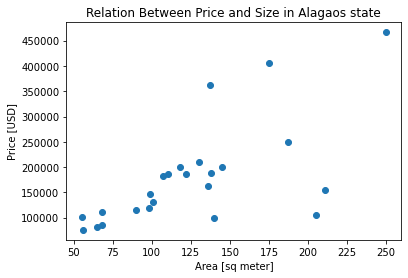

In [160]:
plt.scatter(x=df_alagoas["area_m2"],y=df_alagoas["price_usd"])
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")
plt.title("Relation Between Price and Size in Alagaos state");

In [161]:
df_alagoas["price_usd"].corr(df_alagoas["area_m2"])

0.6537677649338702

moderate positive correlation price and size of properties in alagoas state

Now look at Rio de Janeiro 

In [162]:
df_rio = df[df["state"] =='Rio de Janeiro']

In [163]:
df_rio.head()

,property_type,region,area_m2,price_usd,state,lat,lon,price_per_m2
3743,apartment,Southeast,90.0,278509.06,Rio de Janeiro,-22.929174,-43.231567,3094.545111
3744,house,Southeast,84.0,87609.94,Rio de Janeiro,-22.788343,-42.137508,1042.975476
3745,apartment,Southeast,67.0,241897.33,Rio de Janeiro,-22.930645,-43.240059,3610.407910
3746,apartment,Southeast,84.0,198061.07,Rio de Janeiro,-22.939283,-43.333138,2357.869881
3747,apartment,Southeast,200.0,458906.97,Rio de Janeiro,-22.888212,-43.361767,2294.534850


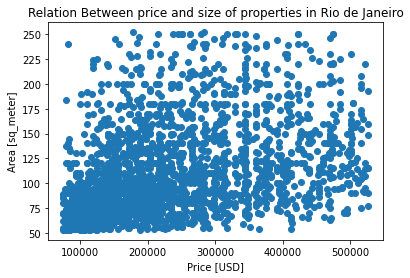

In [164]:
plt.scatter(x=df_rio["price_usd"],y=df_rio["area_m2"])
plt.xlabel("Price [USD]")
plt.ylabel("Area [sq_meter]")
plt.title("Relation Between price and size of properties in Rio de Janeiro");


In [165]:
print(df_rio["price_usd"].corr(df["area_m2"]))

0.216074787260778


positive but poor correlation between price and size of home in Rio de janeiro state